# Lab3: Contrast, equalization and quantization.
Contrast changes in an image
Contrast can be defined as the relative difference in intensity between a point of an image and its neighborhood. The human visual system is more sensitive to contrast than absolute luminance value and, therefore, we are able to perceive the world around us similarly despite the large illumination changes taking place throughout the day.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/2n UNI/3r Trimestre/Processament Imatges/Labs/Lab3/'
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [3]:
def imadjust(x, a, b, c, d, gamma = 1):
    # Similar to imadjust in MATLAB.
    # Converts an image range from [a,b] to [c,d].
    # The Equation of a line can be used for this transformation:
    #   y=((d-c)/(b-a))*(x-a)+c
    # However, it is better to use a more generalized equation:
    #   y=((x-a)/(b-a))^gamma*(d-c)+c
    # If gamma is equal to 1, then the line equation is used.
    # When gamma is not equal to 1, then the transformation is not linear.

    y = (((x - a) / (b - a)) ** gamma) * (d - c) + c
    return y

In [4]:
def default_imadjust(f):
  g = (f - f.min()) / (f.max() - f.min()) * 255
  return g

The aim of this first part of the practice is to experiment with different functions for changing the  contrast and to see their effects on the perception of the image.
The contrast changes with which we are going to work are applied at the pixel level; this means that the modification of the value of a particular pixel depends only on its original value (thus not involving, for example, the values of neighboring pixels).

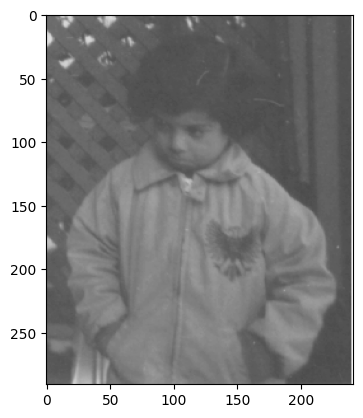

In [5]:
low_con = mpimg.imread(path+"low_contrast.png")
plt.imshow(low_con, cmap = "gray", vmin = 0, vmax = 255)
#lena.min()

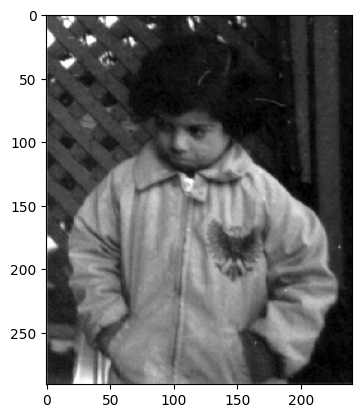

In [6]:
hi_con = mpimg.imread(path+"high_contrast.png")
plt.imshow(hi_con, cmap = "gray", vmin = 0, vmax = 255)

# Linear contrast changes
In Python you can use the imadjust function to perform linear contrast changes. Specifically, the function call with the following parameters:

I_cont = imadjust(I,low_in,high_in,low_out,high_out, gamma)

For Linear contrast changes gamma = 1.

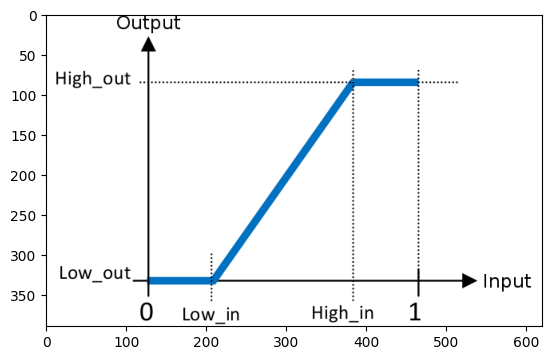

In [7]:
linear_cont = mpimg.imread(path+"linear_change.png")
plt.imshow(linear_cont, cmap="gray")

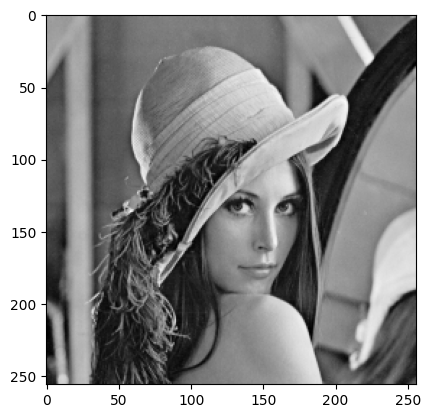

In [8]:
lena = mpimg.imread(path+"lena.png")
plt.imshow(lena, cmap="gray")

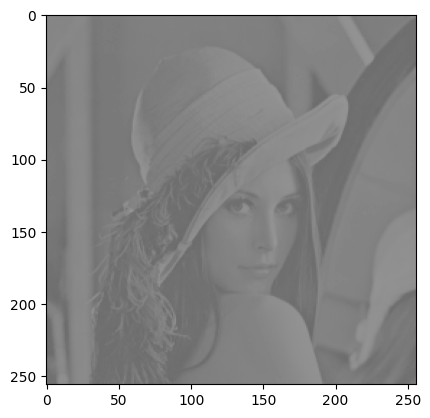

In [9]:
I_cont = imadjust(lena,0,1,0.4,0.6,1)
plt.imshow(I_cont*255, cmap="gray", vmin=0, vmax=255)

# Nonlinear contrast changes
The function imadjust allows you to add a final argument, gamma, to perform nonlinear contrast changes like ones shown in the figure:

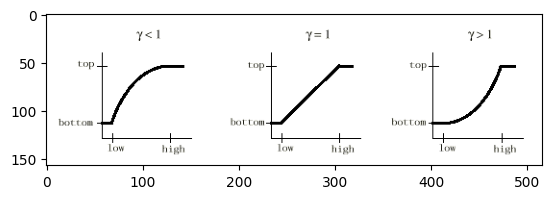

In [10]:
non_linear = mpimg.imread(path+"nonlinear_contrast_change.png")
plt.imshow(non_linear, cmap="gray")

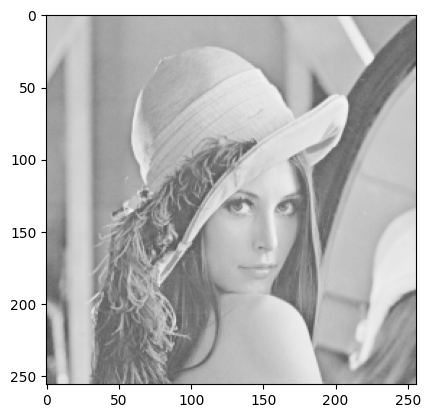

In [11]:
lena_non_linear = imadjust(lena,0,1,0,1,0.5)
plt.imshow(lena_non_linear*255, cmap="gray",vmin=0, vmax=255 )

# Image histogram equalization
The histogram of an image represents the relative frequency of gray levels in the image. Techniques for modifying the histogram of an image are useful for increasing the contrast of an image with highly concentrated histogram.
To calculate the histogram of an image you can use function imhist.
To equalize an image you can follow the procedure on the page 105 of the notes. This notes are also attached in the Supplementary Notes inside the lab pdf, as it was messy to include it here.

# Entropy of an image
A statistical measure related to the histogram is the entropy of an image: H, in bits/pixel. The entropy can be approximated using the image histogram, , as follows (being  the gray levels are discrete or integer):


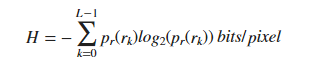


, with:


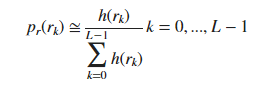

# Quantization
**N-levels uniform quantizer**

In this section we will construct a uniform quantizer. The immediate way to quantize an image is to truncate the real values in the matrix to integers. You can use the function round, which rounds the real values of a matrix to their nearest integers.
When we use round for quantization, we can easily specify how many discrete gray levels we want to keep in the quantized image. Simply multiply the image by a certain value before applying round. For example:

In [12]:
import numpy as np
def uniform_quantizer(image, N):
    if N > 1:
        min_val = image.min()
        max_val = image.max()
        M = max_val - min_val
        g1 = (N-1)/M
        g2 = 255/(N-1)
        output = np.rint(g1*(image - min_val)).astype(int) * g2
    return output

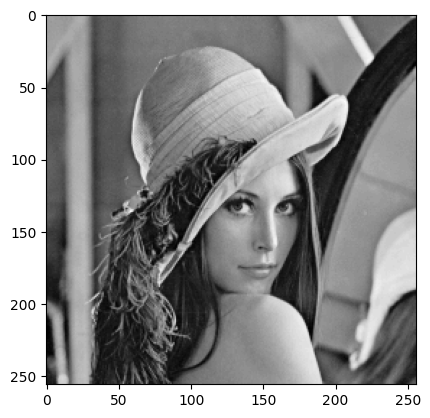

In [13]:
q_lena_58 = uniform_quantizer(lena, 58)
q_lena_11 = uniform_quantizer(lena, 11)
q_lena_3 = uniform_quantizer(lena, 3)
plt.imshow(q_lena_58, cmap="gray")

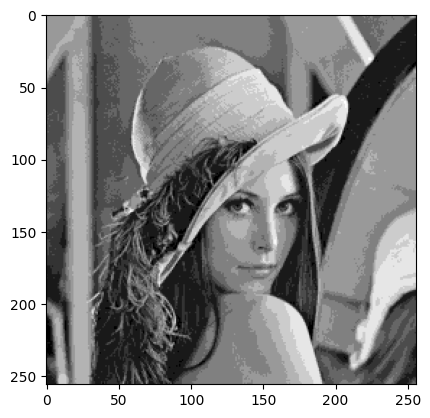

In [14]:
plt.imshow(q_lena_11, cmap="gray")

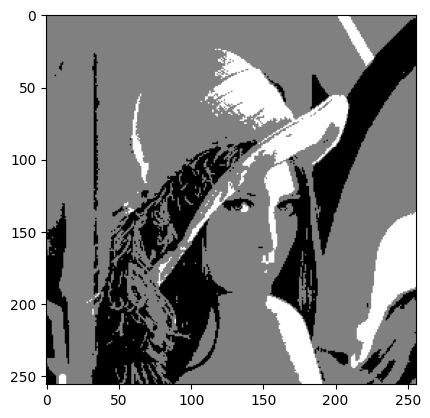

In [15]:
 plt.imshow(q_lena_3, cmap="gray")

From the previous experiment, we included the function uniform_quantizer in the lab exercise file. Now you can use it to experiment with different quantization levels (different values of N).

# Quantitative criteria of fidelity
The criteria of fidelity of an image is useful for measuring the quality of a certain image. Recall (see notes, page 83) that the problem can be stated mathematically as follows: given a certain image , and another image , obtained from  by encoding, transmission, restoration etc., we have a measure of distortion that tells us what is the quality of  with respect to . There are two types of criteria to evaluate the quality of an image: subjective and objective (quantitative). One of the most widely used quantitative measures is the mean squared error. Suppose we have a statistical distribution of a group of images, and that  and  are images of this group. In this case, the mean squared error is:

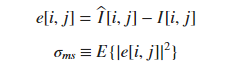

where E represents the expectation. When we do not have the statistics of the images, we use the mean squared error defined by

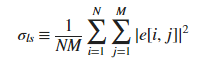

(we assume that the images have been digitized and are represented by M-by-N matrixes). There is a function, immse, which calculates the mean squared error. In many applications, the mean squared error is expressed as a signal to noise ratio, measured in decibels (dB), SNR is defined by the expression:

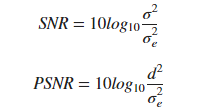

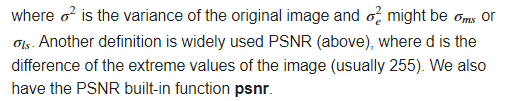


In [16]:
lena = mpimg.imread(path+"lena.png")
def mse(A, B):
    mse = np.square(np.subtract(A,B)).mean()
    return mse
quantized_lena = uniform_quantizer(lena, 100)
quantized_lena

array([[162.27272727, 162.27272727, 159.6969697 , ..., 172.57575758,
        172.57575758, 136.51515152],
       [162.27272727, 162.27272727, 159.6969697 , ..., 172.57575758,
        172.57575758, 136.51515152],
       [162.27272727, 159.6969697 , 159.6969697 , ..., 157.12121212,
        149.39393939, 105.60606061],
       ...,
       [ 28.33333333,  28.33333333,  33.48484848, ...,  64.39393939,
         79.84848485,  77.27272727],
       [ 20.60606061,  25.75757576,  28.33333333, ...,  77.27272727,
         90.15151515,  85.        ],
       [ 20.60606061,  30.90909091,  28.33333333, ...,  90.15151515,
         90.15151515,  95.3030303 ]])

In [17]:
diff = mse(lena*255, quantized_lena)
diff

145.39183562868118

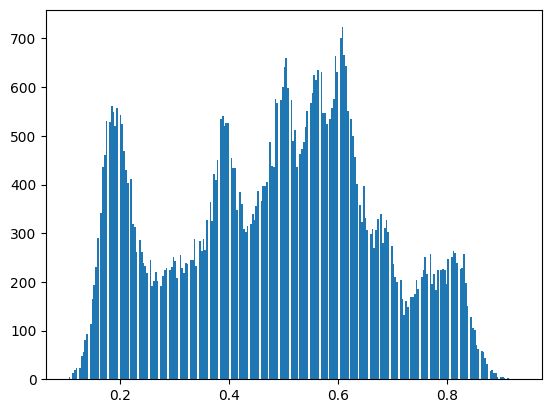

In [18]:
#How to visualize histogram in Python
test = plt.hist(lena.ravel(), bins = 256)
plt.show()

# Accelerating Numpy using Numba and JIT


The computational efficiency for these loops become lighting fast from 15 mins to 1 second, how cool is that?

#Exercise 1

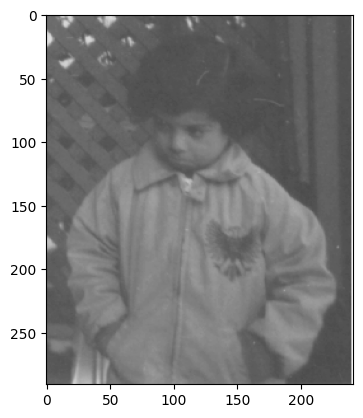

In [19]:
low_con = mpimg.imread(path+"low_contrast.png")
plt.imshow(low_con, cmap = "gray", vmin = 0, vmax = 255)

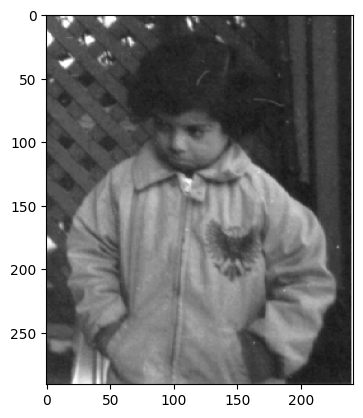

In [20]:
# I_cont = imadjust(I, low_in, high_in, low_out, high_out, gamma)

new_con = imadjust(low_con, 0.25, 0.75, 0, 1, 1)
plt.imshow(new_con)

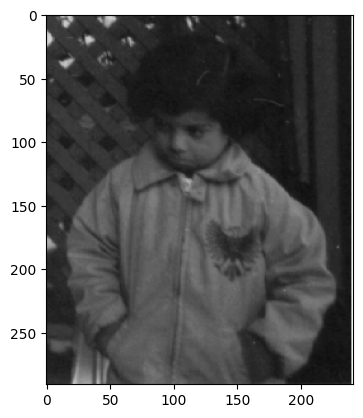

In [21]:
a = imadjust(new_con, 0, 0.6, 0, 0.4, 1)
plt.imshow(a)

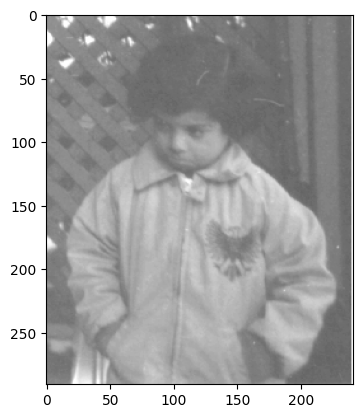

In [22]:
b = imadjust(new_con, 0.4, 1, 0.6, 1, 1)
plt.imshow(b)

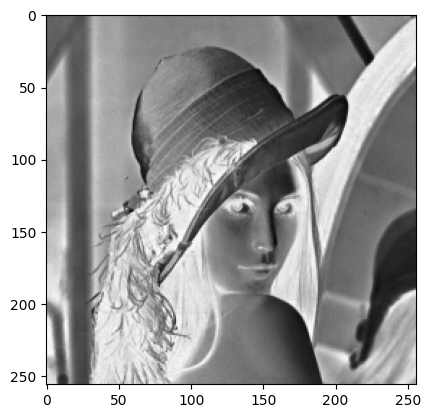

In [23]:
lena = mpimg.imread(path+"lena.png")

c = imadjust(lena, 0, 1, 1, 0, 1)
plt.imshow(c, cmap="gray")

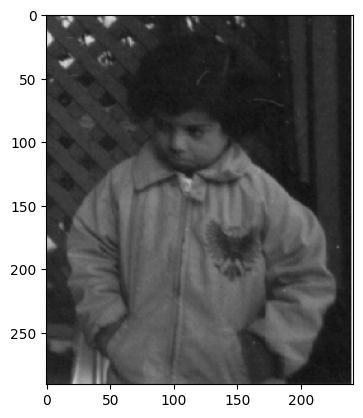

In [24]:
d = imadjust(new_con, 0, 1, 0, 0.7, 1)
plt.imshow(d)

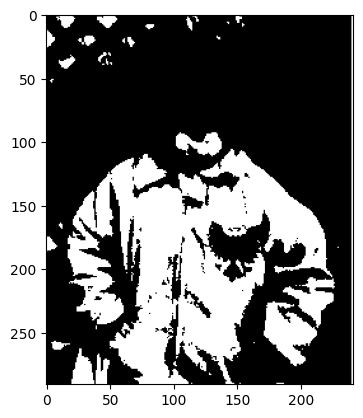

In [25]:
e = new_con[:,:,0] > 0.5
plt.imshow(e, cmap = "gray")

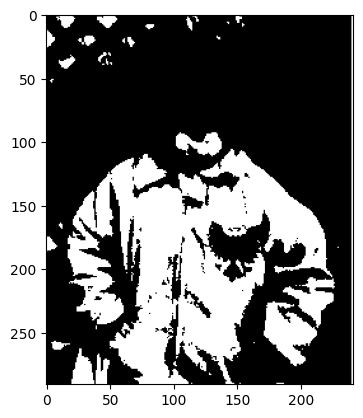

In [26]:
e = np.clip(new_con[:,:,0], 0, 1) > 0.5
plt.imshow(e, cmap = "gray")

#Exercise 2

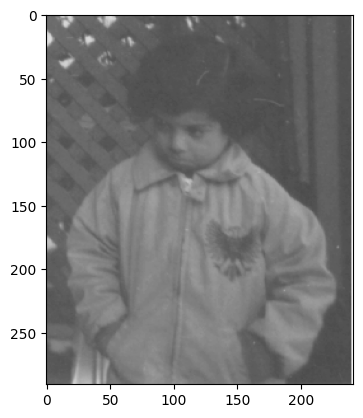

In [27]:
low_con = mpimg.imread(path+"low_contrast.png")
plt.imshow(low_con)

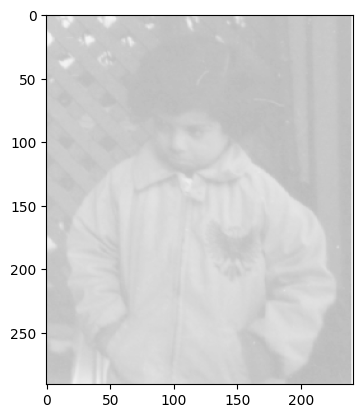

In [28]:
b2 = imadjust(low_con, 0, 1, 0, 1, 0.25)
plt.imshow(b2)

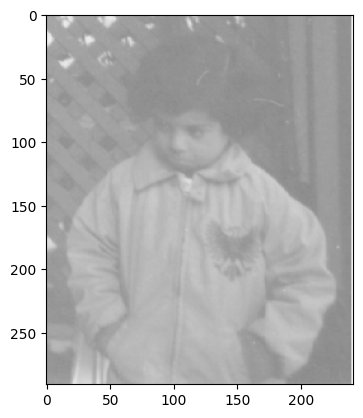

In [29]:
b3 = imadjust(low_con, 0, 1, 0, 1, 0.5)
plt.imshow(b3)

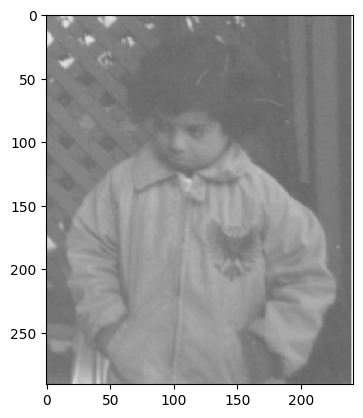

In [30]:
b4 = imadjust(low_con, 0, 1, 0, 1, 0.75)
plt.imshow(b4)

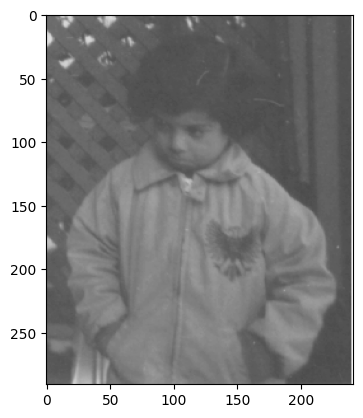

In [31]:
b5 = imadjust(low_con, 0, 1, 0, 1, 1)
plt.imshow(b5)

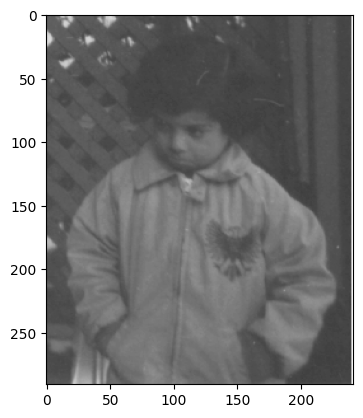

In [32]:
b6 = imadjust(low_con, 0, 1, 0, 1, 1.15)
plt.imshow(b6)

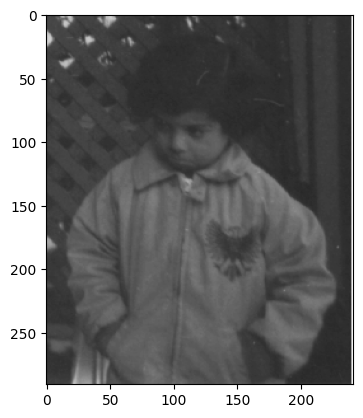

In [33]:
b7 = imadjust(low_con, 0, 1, 0, 1, 1.5)
plt.imshow(b7)

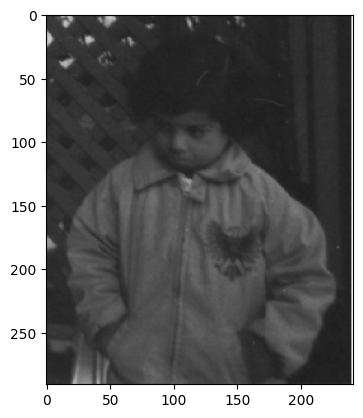

In [34]:
b8 = imadjust(low_con, 0, 1, 0, 1, 1.75)
plt.imshow(b8)

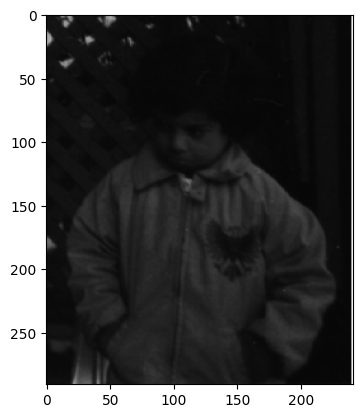

In [35]:
b9 = imadjust(low_con, 0, 1, 0, 1, 3)
plt.imshow(b9)

# Exercise 3

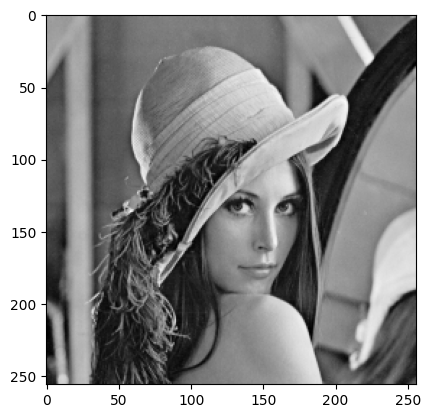

In [36]:
lena = mpimg.imread(path+"lena.png")
plt.imshow(lena, cmap = "gray")

(array([  5.,   0.,  13.,  19.,  23.,   0.,  23.,  48.,  57.,  81.,  94.,
          0., 114., 164., 193., 230., 290.,   0., 341., 436., 461., 531.,
          0., 529., 561., 550., 521., 557.,   0., 542., 525., 468., 429.,
        404.,   0., 412., 319., 312., 262.,   0., 287., 262., 238., 232.,
        218.,   0., 244., 192., 201., 221., 202.,   0., 192., 213., 224.,
        229.,   0., 225., 230., 251., 242., 209.,   0., 256., 228., 219.,
        239., 237.,   0., 246., 245., 288., 232.,   0., 283., 264., 289.,
        266., 328.,   0., 364., 325., 421., 409., 451.,   0., 535., 541.,
        521., 526., 526.,   0., 454., 434., 433., 347.,   0., 384., 360.,
        309., 303., 315.,   0., 318., 339., 327., 355., 387.,   0., 367.,
        397., 398., 406.,   0., 488., 438., 436., 575., 567.,   0., 574.,
        600., 642., 659., 599.,   0., 574., 490., 511., 437.,   0., 462.,
        472., 488., 519., 551.,   0., 568., 587., 625., 614., 636.,   0.,
        632., 547., 547., 525.,   0., 

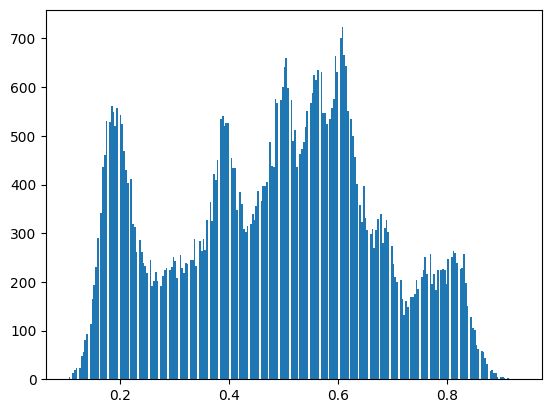

In [37]:
plt.hist(lena.ravel(), bins = 256)

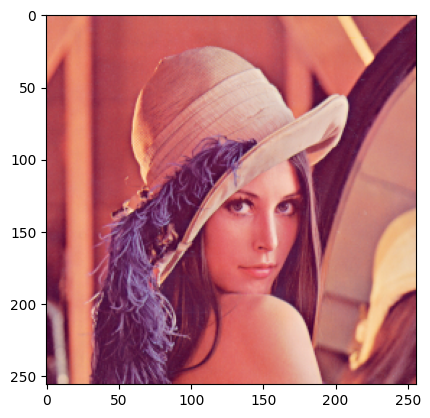

In [38]:
lena_color = mpimg.imread(path+"lena_color.png")
plt.imshow(lena_color)

(array([1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        3.000e+00, 3.000e+00, 0.000e+00, 1.000e+00, 4.000e+00, 9.000e+00,
        1.200e+01, 0.000e+00, 1.300e+01, 1.900e+01, 3.000e+01, 0.000e+00,
        3.600e+01, 3.700e+01, 5.400e+01, 0.000e+00, 6.700e+01, 7.700e+01,
        8.900e+01, 1.060e+02, 0.000e+00, 1.110e+02, 1.200e+02, 1.460e+02,
        0.000e+00, 1.970e+02, 1.970e+02, 2.480e+02, 0.000e+00, 2.980e+02,
        2.800e+02, 3.360e+02, 3.650e+02, 0.000e+00, 3.740e+02, 4.040e+02,
        3.700e+02, 0.000e+00, 3.860e+02, 4.320e+02, 4.110e+02, 0.000e+00,
        4.030e+02, 4.270e+02, 3.890e+02, 4.000e+02, 0.000e+00, 3.820e+02,
        3.660e+02, 3.630e+02, 0.000e+00, 3.610e+02, 3.050e+02, 2.790e+02,
        0.000e+00, 2.720e+02, 2.440e+02, 2.330e+02, 2.520e+02, 0.000e+00,
        1.770e+02, 2.220e+02, 2.020e+02, 0.000e+00, 1.760e+02, 1.770e+02,
        1.660e+02, 0.000e+00, 1.750e+02, 1.710e+02, 1.560e+02, 1.940e+02,
        0.000e+00, 1.510e+02, 1.450e+0

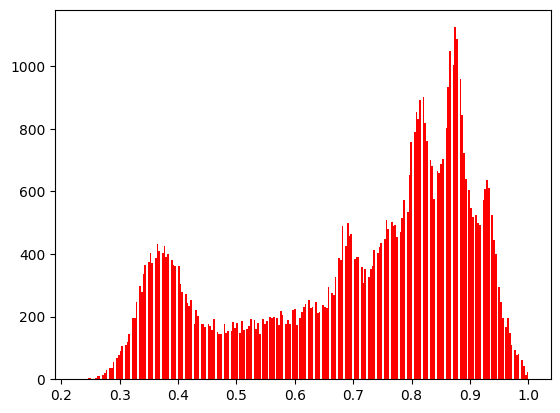

In [39]:
R = lena_color[:,:,0]
G = lena_color[:,:,1]
B = lena_color[:,:,2]

plt.hist(R.ravel(), bins = 256, color = "red")

(array([  1.,   4.,  14.,  18.,  39.,  33.,  50.,  79., 106., 133., 171.,
        221., 222.,   0., 311., 382., 424., 479., 512., 518., 557., 529.,
        574., 528., 483., 510.,   0., 502., 471., 420., 341., 349., 308.,
        282., 271., 278., 255., 284., 254., 276.,   0., 245., 250., 245.,
        271., 269., 256., 248., 237., 269., 253., 234., 260.,   0., 279.,
        251., 245., 284., 251., 312., 347., 391., 359., 426., 476., 511.,
        520.,   0., 550., 513., 482., 480., 484., 417., 396., 373., 376.,
        391., 355., 331.,   0., 344., 358., 369., 382., 334., 352., 403.,
        368., 401., 377., 382., 444., 504.,   0., 486., 548., 541., 556.,
        514., 549., 513., 540., 495., 418., 414., 416.,   0., 439., 391.,
        391., 366., 400., 394., 386., 398., 414., 439., 449., 423., 429.,
          0., 382., 408., 351., 425., 400., 405., 396., 449., 419., 447.,
        476., 472.,   0., 488., 483., 536., 514., 486., 506., 516., 571.,
        485., 546., 476., 435., 386., 

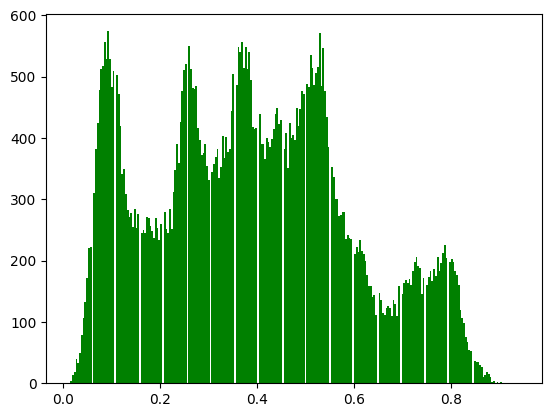

In [40]:
plt.hist(G.ravel(), bins = 256, color = "green")

(array([  2.,   1.,   0.,   3.,   8.,   0.,  11.,  23.,   0.,  46.,  64.,
          0., 115., 116.,   0., 170., 238.,   0., 332., 387.,   0., 476.,
        588.,   0., 692., 734.,   0., 767., 787.,   0., 898., 839.,   0.,
        803., 684.,   0., 680., 675.,   0., 681., 700.,   0., 677., 717.,
          0., 842., 857.,   0., 860., 852.,   0., 790.,   0., 768., 781.,
          0., 706., 695.,   0., 717., 675.,   0., 657., 678.,   0., 740.,
        682.,   0., 775., 723.,   0., 801., 764.,   0., 753., 766.,   0.,
        830., 748.,   0., 756., 721.,   0., 718., 661.,   0., 639., 649.,
          0., 586., 644.,   0., 670., 641.,   0., 733., 667.,   0., 703.,
        648.,   0., 660.,   0., 674., 623.,   0., 681., 670.,   0., 662.,
        684.,   0., 751., 817.,   0., 797., 822.,   0., 810., 835.,   0.,
        701., 647.,   0., 605., 538.,   0., 506., 482.,   0., 363., 343.,
          0., 275., 238.,   0., 240., 239.,   0., 222., 221.,   0., 214.,
        185.,   0., 252., 226.,   0., 

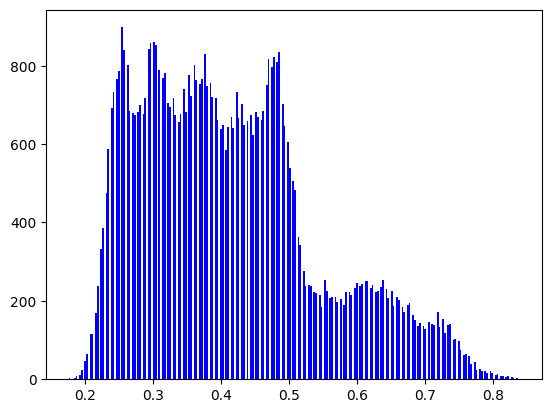

In [41]:
plt.hist(B.ravel(), bins = 256, color = "blue")

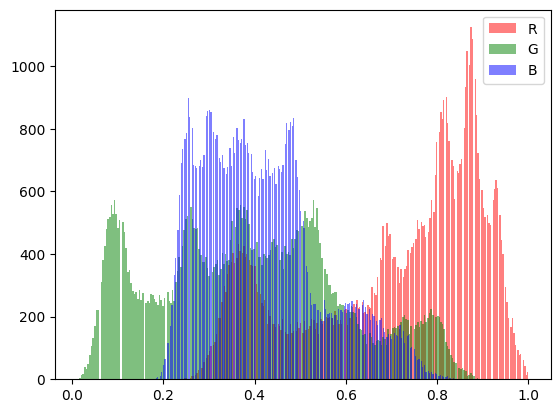

In [42]:
lena_color = mpimg.imread(path+"lena_color.png")
plt.show()

R = lena_color[:,:,0]
G = lena_color[:,:,1]
B = lena_color[:,:,2]

plt.hist(R.ravel(), bins = 256, color = "red", alpha = 0.5, label="R")  # posam alpha a 0.5 per poder diferenciar millor els colors quan es superposen
plt.hist(G.ravel(), bins = 256, color = "green", alpha = 0.5, label = "G")
plt.hist(B.ravel(), bins = 256, color = "blue", alpha = 0.5, label = "B")

plt.legend()
plt.show()

Apartat 3b:

(array([2.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 2.8000e+01,
        0.0000e+00, 1.0900e+02, 2.1700e+02, 0.0000e+00, 3.8900e+02,
        0.0000e+00, 4.2800e+02, 2.5300e+02, 0.0000e+00, 1.4200e+02,
        7.5000e+01, 0.0000e+00, 6.8000e+01, 0.0000e+00, 1.5300e+02,
        5.1500e+02, 0.0000e+00, 1.7190e+03, 0.0000e+00, 4.7410e+03,
        8.7880e+03, 0.0000e+00, 1.2234e+04, 1.4307e+04, 0.0000e+00,
        1.2876e+04, 0.0000e+00, 9.5000e+03, 6.8090e+03, 0.0000e+00,
        5.4740e+03, 5.1370e+03, 0.0000e+00, 5.7970e+03, 0.0000e+00,
        6.5310e+03, 8.1340e+03, 0.0000e+00, 9.7240e+03, 0.0000e+00,
        1.1645e+04, 1.2933e+04, 0.0000e+00, 1.4084e+04, 1.4528e+04,
        0.0000e+00, 1.4736e+04, 0.0000e+00, 1.5388e+04, 1.6408e+04,
        0.0000e+00, 1.7667e+04, 0.0000e+00, 1.7734e+04, 1.4425e+04,
        0.0000e+00, 1.4369e+04, 9.6710e+03, 0.00

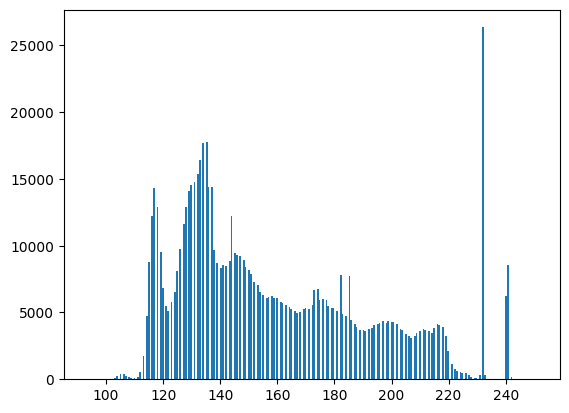

In [43]:
image = mpimg.imread(path+"hat.jpg")   # Anem canviant el directori de les fotografies, per veure diferents resultats
plt.hist(image.ravel(), bins = 256)

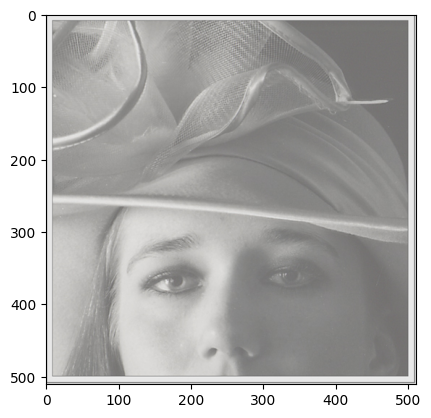

In [44]:
plt.imshow(image, cmap = 'gray')

In [45]:
def histogram_equalization(image):

    hist = np.histogram(image.ravel(), bins = 256, range = (0, 256))[0]
    bins = np.histogram(image.ravel(), bins = 256, range = (0, 256))[1]

    N = image.size
    cdf = np.cumsum(hist)
    cdf_norm = cdf / N

    equalized_image = np.interp(image.ravel(), bins[:-1], cdf_norm)
    equalized_image = np.reshape(equalized_image, image.shape)
    equalized_image = ((equalized_image - equalized_image.min()) * 255 / (1 - equalized_image.min())).astype(np.uint8)

    return equalized_image


(array([2.3870e+03, 1.7190e+03, 4.7410e+03, 0.0000e+00, 0.0000e+00,
        8.7880e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.2234e+04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4307e+04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.2876e+04, 0.0000e+00,
        0.0000e+00, 9.5000e+03, 0.0000e+00, 6.8090e+03, 0.0000e+00,
        5.4740e+03, 0.0000e+00, 5.1370e+03, 0.0000e+00, 5.7970e+03,
        0.0000e+00, 6.5310e+03, 0.0000e+00, 8.1340e+03, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 9.7240e+03, 0.0000e+00, 0.0000e+00,
        1.1645e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.2933e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4084e+04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4528e+04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4736e+04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5388e+04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.6408e+04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

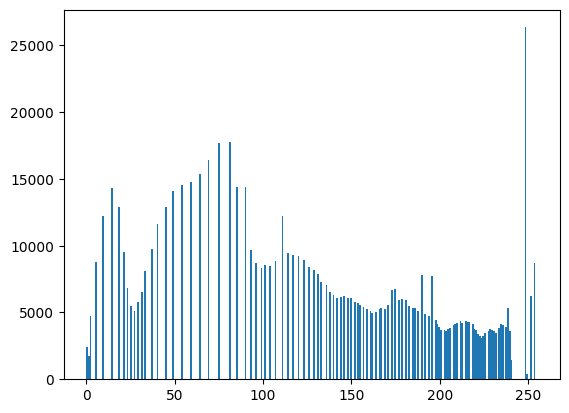

In [46]:
equalized_image = histogram_equalization(image)
plt.hist(equalized_image.ravel(), bins=256)

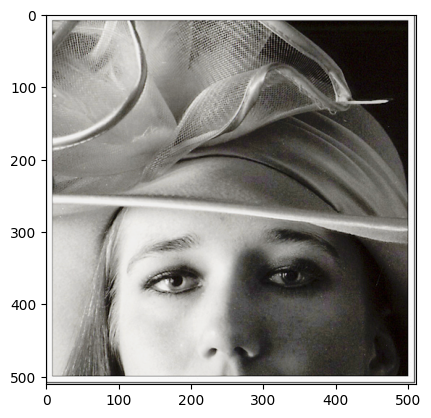

In [47]:
plt.imshow(equalized_image, cmap = 'gray')

# Exercise 4

In [48]:
def calcular_entropia(image):
  histograma, bin_edges = np.histogram(image, bins=256, density=True)
  # La funció histograma de numpy, en lloc de plotejar l'historgrama, retorna dos arrays:
  #  --> histograma: el nombre de vegades que surt cada color de gris
  #  --> bin_edges: els intervals en que es dividiex l'interval (256 perquè tenim 256 possibles tons de gris)

  histograma = histograma + 1e-10 # Com que feim feina amb logaritmes, hem d'evitar log(0) i li sumam un valor molt petit a cada element de l'array

  entropia = - np.sum(histograma * np.log2(histograma))
  return entropia

In [49]:
imatge_original = mpimg.imread(path+"lena.png") * 255
entropia = calcular_entropia(imatge_original)
entropia

8.669355039757967

In [50]:
imatge_equalitzada = histogram_equalization(imatge_original)
entropia = calcular_entropia(imatge_equalitzada)
entropia

7.350992535644492

# Exercise 5

In [51]:
def normalize(X):
  return (X - X.min()) / (X.max() - X.min())

In [52]:
def image_quantization(image, levels): # --> AQUESTA FUNCIÓ VA BÉ SI LA IMATGE ESTÀ NORMALITZADA --> s'ha usat aquesta funció per resoldre el 5a i la funció ja feta per al 5b

  image_quantitzada = np.floor(image * levels) # --> es multiplica el valor de cada píxel per el nombre de nivells de grissos que volem i es fa floor per arrodonir el valor i poder quantitzar la imatge

  return image_quantitzada

(-0.5, 255.5, 255.5, -0.5)

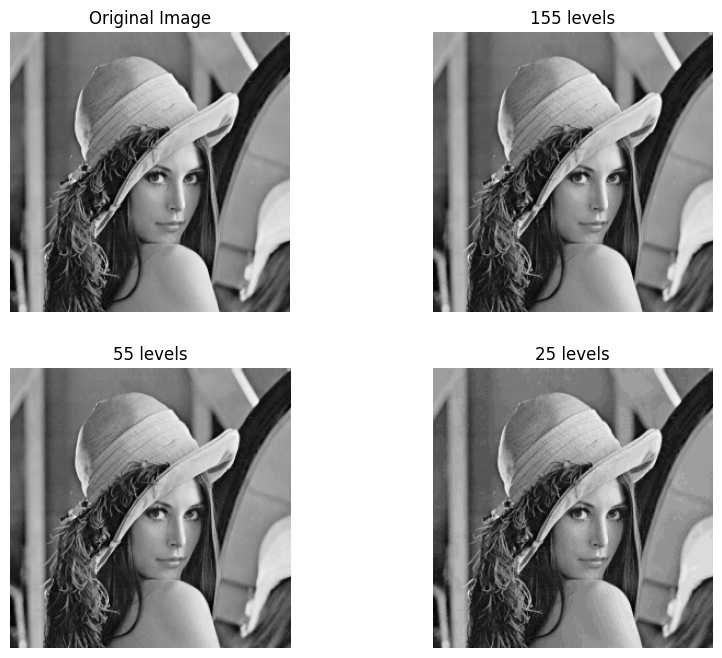

In [53]:
imatge_original = mpimg.imread(path+"lena.png")

plt.figure(figsize = (10, 8))

plt.subplot(2, 2, 1)
huh = image_quantization(imatge_original, 255)
plt.imshow(huh, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
huh = image_quantization(imatge_original, 155)
plt.imshow(huh, cmap = 'gray')
plt.title('155 levels')
plt.axis('off')

plt.subplot(2, 2, 3)
huh = image_quantization(imatge_original, 55)
plt.imshow(huh, cmap = 'gray')
plt.title('55 levels')
plt.axis('off')

plt.subplot(2, 2, 4)
huh = image_quantization(imatge_original, 25)
plt.imshow(huh, cmap = 'gray')
plt.title('25 levels')
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

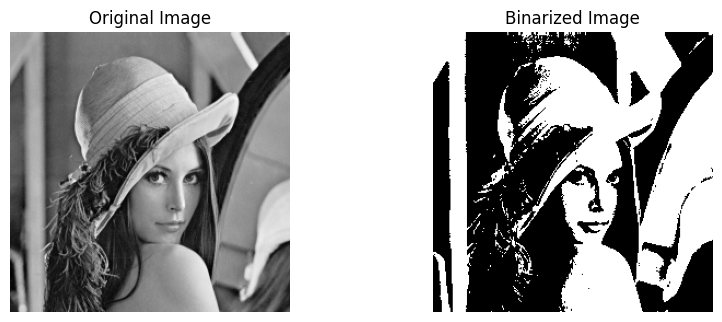

In [54]:
original_image = mpimg.imread(path+"lena.png")

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(original_image, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
huh = uniform_quantizer(original_image, 2)
plt.imshow(huh, cmap = 'gray')
plt.title('Binarized Image')
plt.axis('off')

# Exercise 6

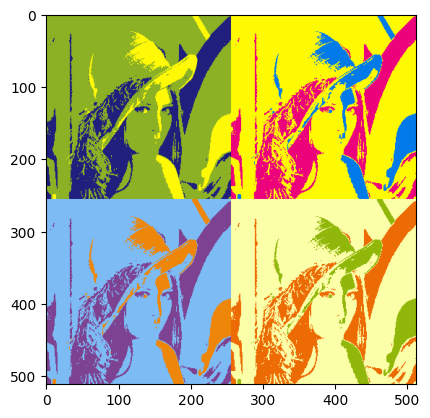

In [55]:
original_image = mpimg.imread(path+"lena.png")
three_level_image = uniform_quantizer(original_image, 3)

p1 = np.zeros((three_level_image.shape[0], three_level_image.shape[1], 3), dtype=np.uint8)
for i in range(p1.shape[0]):
  for j in range(p1.shape[1]):
    if three_level_image[i, j] == 0:
      p1[i, j] = [32, 31, 125]
    if three_level_image[i, j] == 127.5:
      p1[i, j] = [140, 177, 37]
    if three_level_image[i, j] == 255:
      p1[i, j] = [255, 249, 8]

p2 = np.zeros((three_level_image.shape[0], three_level_image.shape[1], 3), dtype=np.uint8)
for i in range(p2.shape[0]):
  for j in range(p2.shape[1]):
    if three_level_image[i, j] == 0:
      p2[i, j] = [236, 2, 123]
    if three_level_image[i, j] == 127.5:
      p2[i, j] = [254, 250, 3]
    if three_level_image[i, j] == 255:
      p2[i, j] = [2, 122, 234]

p3 = np.zeros((three_level_image.shape[0], three_level_image.shape[1], 3), dtype=np.uint8)
for i in range(p3.shape[0]):
  for j in range(p3.shape[1]):
    if three_level_image[i, j] == 0:
      p3[i, j] = [125, 66, 146]
    if three_level_image[i, j] == 127.5:
      p3[i, j] = [125, 187, 244]
    if three_level_image[i, j] == 255:
      p3[i, j] = [238, 134, 9]

p4 = np.zeros((three_level_image.shape[0], three_level_image.shape[1], 3), dtype=np.uint8)
for i in range(p4.shape[0]):
  for j in range(p4.shape[1]):
    if three_level_image[i, j] == 0:
      p4[i, j] = [236, 107, 5]
    if three_level_image[i, j] == 127.5:
      p4[i, j] = [251, 255, 168]
    if three_level_image[i, j] == 255:
      p4[i, j] = [145, 183, 10]

temp1 = np.hstack((p1, p2))
temp2 = np.hstack((p3, p4))

collage = np.vstack((temp1, temp2))

plt.imshow(collage)

# Exercise 7

In [56]:
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import mean_squared_error

In [57]:
original_image = plt.imread(path+"lena.png")

M, N = original_image.shape

quantized_image = uniform_quantizer(original_image, 3)

sigma_ls = mean_squared_error(original_image, quantized_image) / M * N

variance_original = np.var(original_image)

snr_ls = 10 * np.log10(variance_original / sigma_ls * sigma_ls)

psnr_ls = 10 * np.log10(255 * 255 / sigma_ls * sigma_ls)

print("σls:", sigma_ls)   # Error quadràtic mitjà
print("PSNR (σls):", psnr_ls)

σls: 17812.464607903068
PSNR (σls): 48.1308036086791


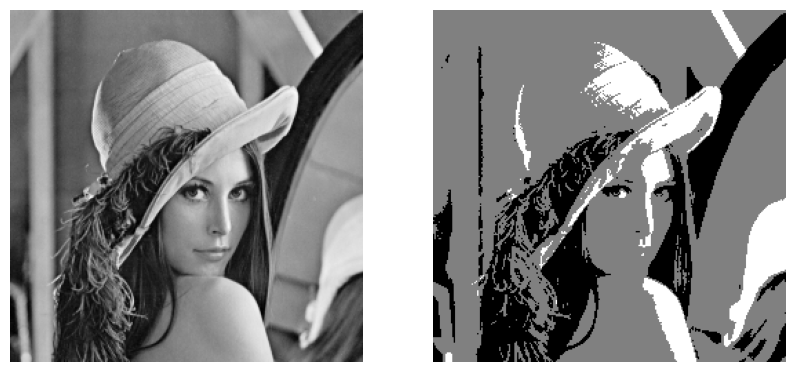

In [58]:
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap = 'gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(quantized_image, cmap = 'gray')
plt.axis('off')

plt.show()